<a href="https://colab.research.google.com/github/jhportfolio1/Microsoft-AI-School/blob/main/Img04_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%B2%98%EB%A6%AC_%EA%B3%A0%EA%B8%89%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 다양한 이미지 처리 방법
- 이미지 필터링 : 원본 이미지를 변형하는데 사용할 작은 매트릭스
- openCV : 이미지 매끄럽게 만드는 방법은? 
- 평균화 필터 : 왼쪽 입력 이미지가 평균화필터(박스필터)로 처리됨. 모든 계수는 1/9라는 동일한 값 가짐
- 임계값처리(Thresholding)을 할때 이미지가 1과 0으로 극단적으로 구분되는데, 이때 노이즈값이 섞여있다면 노이즈가 극대화됨. 
- 따라서 임계값 처리 전에는 블러링을 꼭 사용함

# 2. 기본 이미지처리 기술을 이용한 이미지 선명도 처리

>## 1) 이미지 읽기 및 블러처리 

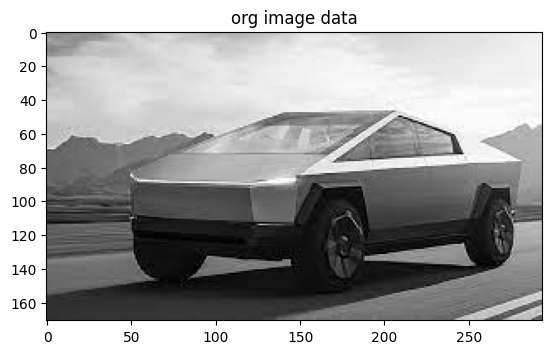

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = 'car.jpeg'

#이미지 읽기
image = cv2.imread(image_path, 0)

#색상의 문제 발생 BGR >> RGB 컨버터 필요
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, 'gray')
plt.title('org image data')
plt.show()

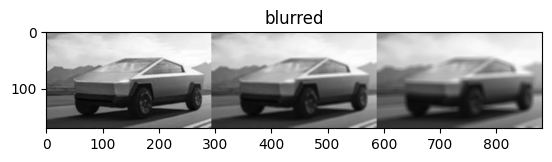

In [ ]:
### 이미지 블러 처리하기
blurred_1 = np.hstack([
    cv2.blur(image,(3,3)),
    cv2.blur(image,(5,5)),
    cv2.blur(image,(9,9))
])

plt.imshow(blurred_1, 'gray')
plt.title('blurred')
plt.show()

>## 2) 가우시안 필터
>- 이미지 처리에서 가장 일반적으로 사용되는 커널

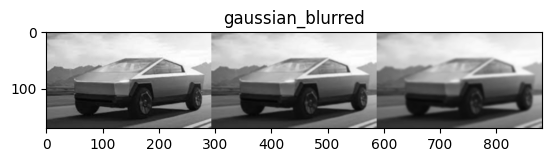

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = 'car.jpeg'

#이미지 읽기
image = cv2.imread(image_path, 0)

### 이미지 가우시안 처리하기
gaussian_blurred1 = np.hstack([
    cv2.GaussianBlur(image,(3,3),0),
    cv2.GaussianBlur(image,(5,5),0),
    cv2.GaussianBlur(image,(9,9),0)
])

plt.imshow(gaussian_blurred1, 'gray')
plt.title('gaussian_blurred')
plt.show()

>## 3) 선명화 프로세스
>- 이미지 가장자리 향상
>- 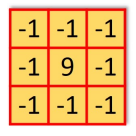

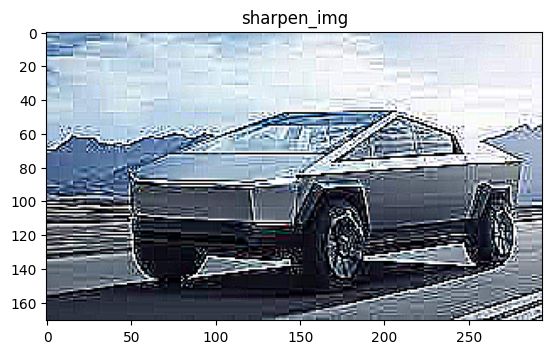

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = 'car.jpeg'

#이미지 읽기
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#선명화 필터 적용
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

#Filter2D 적용
sharpen_img = cv2.filter2D(image, -1, filter)

plt.imshow(sharpen_img)
plt.title('sharpen_img')
plt.show()

>## 4) 샤프닝 필터 버전 : 멕시칸 햇 / 라플라시안 필터
>- 멕시칸 햇 : 선명도 향상, 고주파 성분 강화, 이미지 경계선 부드럽게 
>- 라플라시안 : 이미지 경계선 부분의 선명도 강조

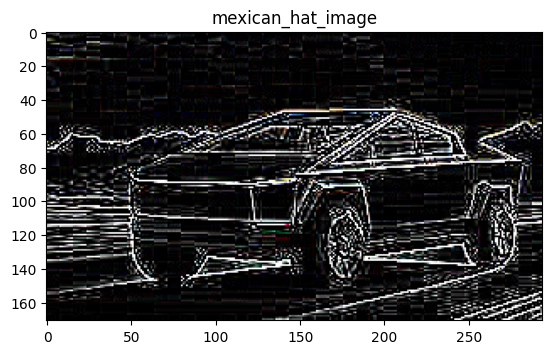

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = 'car.jpeg'

#이미지 읽기
image = cv2.imread(image_path, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#선명화 필터 적용
filter = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

#Filter2D 적용
sharpen_img = cv2.filter2D(image, -1, filter)

#멕시칸 햇 적용
filter = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
mexican_hat_img = cv2.filter2D(image, -1, filter)

plt.imshow(mexican_hat_img)
plt.title('mexican_hat_image')
plt.show()

>## 5) Custom Filter 만들기 
>- Cv2.filter2D 계수 필터값 설정하여 필터링 수행 가능

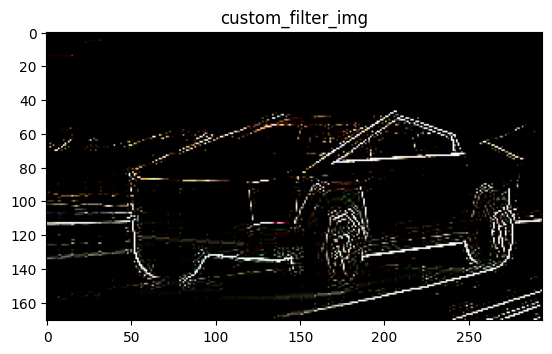

In [1]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
image_path = 'car.jpeg'

# 이미지 읽기
image = cv2.imread(image_path,1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Custoom Ftilter 
filter = np.array([[3,-2,-3], [-4,-6,7], [6,-2,0]])

# Custome Filter 적용
custom_filter_img = cv2.filter2D(image, -1, filter)

plt.imshow(custom_filter_img)
plt.title('custom_filter_img')
plt.show()

>## 6) 다양한 표과 필터 
>- 인스타그램 필터 만들기
>- 폴더에 들어있는 전체 사진에 적용하기 

In [8]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import os
import glob
image_path = './content'
image_list = glob.glob(os.path.join(image_path, '*.jpeg'))

for path in image_list :
  image = csv.imread(path, 1)

  # 효과 필터 적용
  filter = np.array([[0.272, 0.534, 0.131],
                     [0.117, 0.686, 0.168],
                     [0.393, 0.769, 0.189]])
  
  sepia_img = cv2.transform(image, filter)

  plt.imshow(sepia_img)
  plt.title('sepia_img')
  plt.show()

>## 7) 엠보스 효과
>- 필터 방향에 따라 사용할 수 잇는 필터가 있음
>- 수직, 수평, 대각선 버전 가질 수 있음

In [11]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import os
import glob
image_path = './content'
image_list = glob.glob(os.path.join(image_path, "content", "*.jpeg"))

for path in image_list :
  image = cv2.imread(path,1)

  #엠보스 효과
  filter_np.array([[0,1,0], [0,0,0], [0,-1,-0]])

  emboss_img = cv2.filter2D(image, -1, filter)
  emboss_img = emboss_img + 128

  plt.imshow(emboss_img)
  plt.title('emboss_img')
  plt.show()

>## 8) 이미지 팽창(확장) : 이미지에 밝은 픽셀 추가
>- 커널 각 위치에 대한 로컬 최대값 계산
>- 로컬 최대값을 출력 이미지에 저장
>- 이미지와 최대값 겹치면 흰색 픽셀 있는 픽셀 집합으로 정의됨
>- 흰색 사과의 노이즈는 가우시안 블러를 사용하면 효과적으로 사라짐

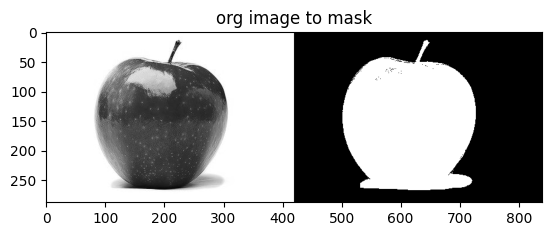

In [12]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

"""
추가 매개변수 : 임계강도 픽셀 값(230~255 사이값)
임계값 알고리즘 : THRESH_BINARY_INV(230보다 작은값 : 흰색 / 230보다 크면 : 검은색)
"""

_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)

image_list = np.hstack([image, mask])

plt.imshow(image_list, 'gray')
plt.title('org image to mask')
plt.show()

>## 9) 이미지 확장 - 2번이상 적용
>- 두 번 이상 적용 가능
>- 매개변수 10설정 -> 10번 반복
>- 반복횟수 줄이고, 5x5 커널에서 진행하는 것이 좋음

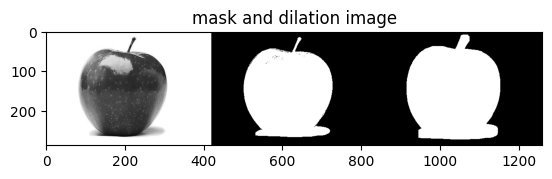

In [19]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=3)

image_list = np.hstack([image, mask, dilation])

plt.imshow(image_list, 'gray')
plt.title('mask and dilation image')
plt.show()

>## 10) 이미지 침식
>- 로컬 최소값을 계산하여 이미지와 겹침

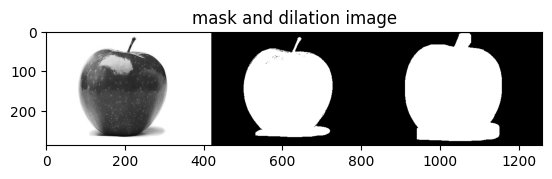

In [16]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations=10)

image_list = np.hstack([image, mask, dilation])

plt.imshow(image_list, 'gray')
plt.title('mask, dilation, erosion image')
plt.show()


>## 12) 이미지 확장 침식 동시 적용

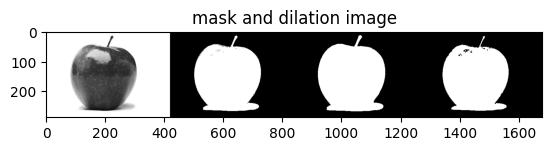

In [21]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)

image_list = np.hstack([image, mask, dilation, erosion])

plt.imshow(image_list, 'gray')
plt.title('mask and dilation image')
plt.show()

>## 13) 이미지 개폐
>- 팽창 적용 → 침식 적용 → 개폐 적용

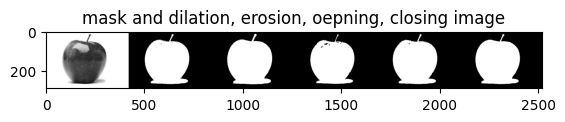

In [23]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

image_list = np.hstack([image, mask, dilation, erosion, opening, closing])

plt.imshow(image_list, 'gray')
plt.title('mask and dilation, erosion, oepning, closing image')
plt.show()

>## 14) 탑햇(Top Hat)
>- 이미지 간 개방감 차이

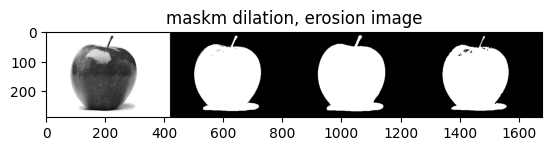

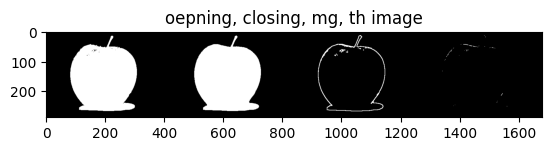

In [26]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np

image_path = 'apple.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

image_list1 = np.hstack([image, mask, dilation, erosion])
image_list2 = np.hstack([opening, closing, mg, th])


plt.imshow(image_list1, 'gray')
plt.title('maskm dilation, erosion image')
plt.show()

plt.imshow(image_list2, 'gray')
plt.title('oepning, closing, mg, th image')
plt.show()